In [21]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget
plt.close('all')
import numpy as np
from sklearn.preprocessing import StandardScaler
from random import choice
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
from amftrack.util.plot import gridplot
from amftrack.pipeline.final_analysis.density_wave import plot_single_plate
analysis_folders = get_analysis_folders()
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders)

plt.style.use('presentation.mplstyle')

FileNotFoundError: File C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\PRINCE\105_20220817\Analysis_105_20220817_5_Version1\time_plate_info.json does not exist

In [2]:
import matplotlib as mpl
cmap1 = mpl.cm.get_cmap('spring')
cmap2 = mpl.cm.get_cmap('winter')
def S(t,lamb,C,t0):
    return(C*(1/(1+np.exp(lamb*(t0-t)))))
def dS(t, lamb, C, t0):
    return C * (1 / (np.exp(-lamb * (t0 - t)) + np.exp(lamb * (t0 - t))))

In [3]:
Css = {}
lambss = {}
dss = {}
meancurves = {}
meancurves2 = {}
t0ss = {}
timestep = {32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 65,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:150,152:35,792:60,1048:60,1045:50,941:50}
timestep2 = {102:25,83:70,76:20,81:70,32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 75,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:100,152:35,792:50,1048:60,1045:50}
timestep = {**timestep, **timestep2}
timestep2 = {1014 : 80,1024:25,1027:18,1028:60,1030 : 60,1032 : 50,1042 : 120,1048:70,127:120,129:60,130:50,991:40}
timestep = {**timestep, **timestep2}
timestep2 = {1023 : 60,1031:30,1035:30,1037 : 80,1039 : 90,1045:70,1047:50,1053:40}
timestep = {**timestep, **timestep2}    

timestep2 = {1071 : 25,1076:70,839:60,938 : 35}
timestep = {**timestep, **timestep2}
timestep2 = {30 : 62,32 : 160,33:80}
timestep = {**timestep, **timestep2}

***Agg plates***

In [4]:
strains = ["'Agg'"]
plates = [plate for plate in folders['Plate'].unique() if folders.loc[folders['Plate']==plate].iloc[0]['strain'] in strains]
treatments = ["'001P100N100C'","'001P100N'","'001P100N200C'"]
plates = [plate for plate in plates if folders.loc[folders['Plate']==plate].iloc[0]['medium'] in treatments]
plates = [30,32,33]

C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\coren\documents\phd\code\amftrack\amftrack\pipeline\final_analysis\density_wave.py:37: RuntimeWarning: overflow encountered in exp
  return C * (1 / (1 + np.exp(lamb * (t0 - t))))


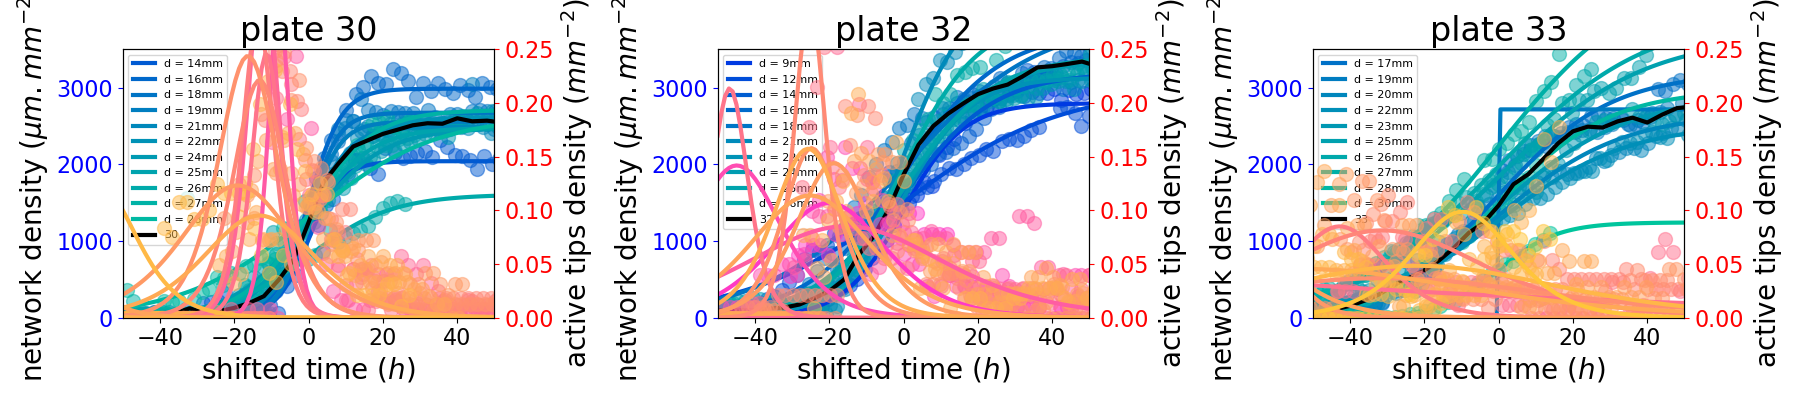

In [8]:
# plt.close('all')
ncols = 3
fig,axs = gridplot(len(plates),ncols = ncols,subh = 4.0,subw = 6)
maxis = {plate :12 for plate in plates}
for i,ax in enumerate(axs):
    plate=plates[i]
    Cs, lambs,ds,indexes, t0s,meancurve,meancurve2 = plot_single_plate(plate,time_plate_info,timestep[plate],ax,maxi =maxis[plate])
    meancurves[plate]=meancurve
    meancurves2[plate]=meancurve2
    Css[plate] = Cs
    lambss[plate] = lambs
    dss[plate] = ds
    t0ss[plate] = t0s
    ax.set_xlim((-50, 50))
    # ax2.set_ylim((0, 0.25))
    ax.set_ylim((0, 3500))

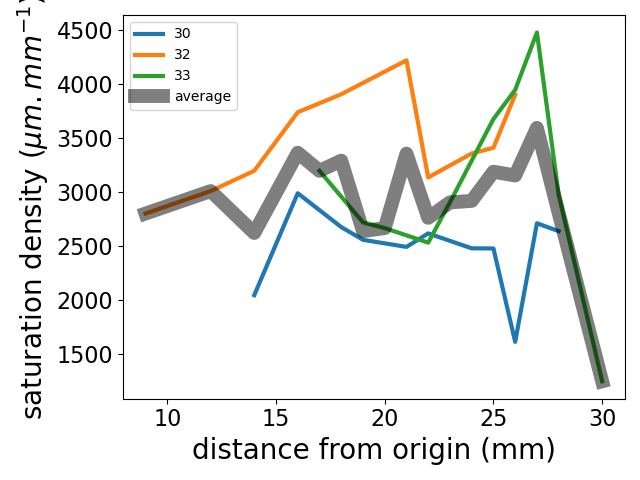

In [6]:
fig, ax = plt.subplots()
tot_ds = []
tot_Cs=[]
# plates = [52,152,94,102,83,84,792,76]
for plate in plates:
    Cs = Css[plate]
    ds = dss[plate]
    tot_ds+=ds
    tot_Cs+=Cs
    ax.plot(ds,Cs,label = plate)
df = pd.DataFrame((tot_ds,tot_Cs)).transpose()
df.columns = ('distance','saturation density')
data = df.groupby('distance').mean()
ax.plot(data.index,data,label="average",color='black',linewidth=10,alpha = 0.5)    
ax.legend()
ax.set_xlabel('distance from origin (mm)')
ax.set_ylabel('saturation density ($\mu m.mm^{-1}$)')
plt.tight_layout()

***A5 100C plates***

In [17]:
strains = ["'A5'","'A5sp3'"]
plates = [plate for plate in folders['Plate'].unique() if folders.loc[folders['Plate']==plate].iloc[0]['strain'] in strains]
treatments = ["'001P100N100C'","'001P100N'"]
plates = [plate for plate in plates if folders.loc[folders['Plate']==plate].iloc[0]['medium'] in treatments]
# plates.remove(1071)
# plates.remove(938)
# plates.remove(102)
plates.remove(877)
plates.remove(907)
# plates2 = [52,84,941,94,152,102,76,83]
# for plate in plates2:
#     if plate in plates:
#         plates.remove(plate)

# plates.remove(102)
# plates = [52,84,94,152,102,76,83]

# plates.remove(76)
# plates.remove(941)


In [18]:
plates

[100,
 102,
 105,
 108,
 111,
 152,
 403,
 52,
 56,
 66,
 75,
 76,
 792,
 799,
 800,
 81,
 83,
 84,
 89,
 91,
 94,
 99]

In [67]:
def plot_single_plate(
    plate, time_plate_info, timestep_max,ax, maxi=10, max_area=50, savefig=None
):
    ax.set_title(f"plate {plate}")
    ax2 = ax.twinx()
    table = time_plate_info.loc[time_plate_info["Plate"] == plate].copy()
    table = table.loc[table["timestep"] <= timestep_max]
    table = table.set_index("timestep")
    ts = []
    ys = []
    ys2 = []
    Cs = []
    lambs = []
    indexes = []
    t0s = []
    ds = []
    for index in range(1, maxi):
        column = f"ring_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"

        start = np.min(
            table.loc[table[column] >= 400]["time_since_begin"]
        ) / pd.Timedelta(hours=1)
        if not np.isnan(start):
            table[f"time_since_begin_{index}"] = (
                table["time_since_begin"] / pd.Timedelta(hours=1) - start
            )

            area = np.sqrt(table["area_sep_comp"][0] + 100 * index)

            selection_fit = table
            try:
                popt0, pcov = curve_fit(
                    S,
                    selection_fit[f"time_since_begin_{index}"],
                    selection_fit[column],
                    bounds=([0, 0, -np.inf], 3 * [np.inf]),
                    p0=[1, 1, 0],
                )
            except:
                # print(selection_fit[column2])
                continue
            lamb, C, t0 = list(popt0)

            table[f"time_since_begin_{index}"] = table[f"time_since_begin_{index}"] - t0

            ax.scatter(
                table[f"time_since_begin_{index}"],
                table[column],
                alpha=0.5,
                color=cmap2(area / max_area),
            )
            ax2.scatter(
                table[f"time_since_begin_{index}"],
                table[column2],
                alpha=0.5,
                color=cmap1(area / max_area),
            )
            Cs.append(C)
            lambs.append(lamb)
            indexes.append(index)
            t0s.append(t0 + start)
            ds.append(int(area / np.sqrt((np.pi / 2))))
            x = np.linspace(-50, 50, 100)
            ax.plot(
                x,
                S(x + t0, lamb, C, t0),
                color=cmap2(area / max_area),
                label=f"d = {int(area / np.sqrt((np.pi / 2)))}mm",
            )
            try:
                    popt1, _ = curve_fit(
                    dS,
                    selection_fit[f"time_since_begin_{index}"],
                    selection_fit[column2],
                    bounds=([0, 0, -np.inf], 3 * [np.inf]),
                    p0 = [0.2,0.5,0]
                )
            except:
                continue
            lamb, C, t1 = list(popt1)

            ax2.plot(
                x,
                dS(x + t0, lamb, C, t1),
                color=cmap1(area / max_area),
                label=f"d = {int(area / np.sqrt((np.pi / 2)))}mm",
            )
            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame(
        (np.array((ts, ys, ys2))).transpose(), columns=("ts", "ys", "ys2")
    )
    factor = 4
    df["ts_round"] = (df["ts"] / factor).astype(int) * factor
    meancurve = df.groupby('ts_round')['ys'].mean()
    ax.plot(meancurve.index,meancurve,label=plate,color="black")
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    ax2.plot(meancurve.index,meancurve2,label=plate,linestyle="")
    ax.set_xlim((-30, 30))
    ax2.set_ylim((0, 0.25))
    ax.set_ylim((0, 2500))

    ax.set_ylabel("network density ($\mu m.mm^{-2}$)")
    ax.set_xlabel("shifted time ($h$)")
    ax2.set_ylabel("active tips density ($mm^{-2}$)")
    ax.tick_params(axis="y", colors="blue")
    ax2.tick_params(axis="y", colors="red")
    ax.legend(fontsize=8)
    plt.tight_layout()
    if not savefig is None:
        plt.savefig(savefig)
    return (Cs, lambs,ds,indexes, t0s,meancurve,meancurve2)

C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


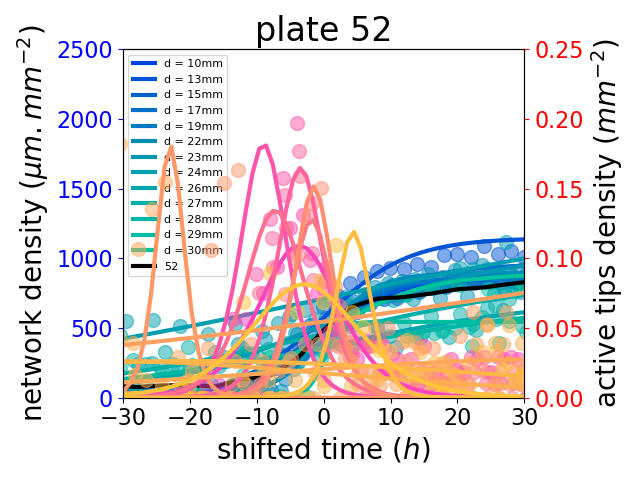

In [19]:
fig,ax = plt.subplots()
maxis = {plate :15 for plate in plates}

plate = 52
Cs, lambs,ds,indexes, t0s,meancurve,meancurve2 = plot_single_plate(plate,time_plate_info,timestep[plate],ax,maxi =maxis[plate])
meancurves[plate]=meancurve
meancurves2[plate]=meancurve2
Css[plate] = Cs
lambss[plate] = lambs
dss[plate] = ds
t0ss[plate] = t0s

***Plotting in a fixed point***

KeyError: 100

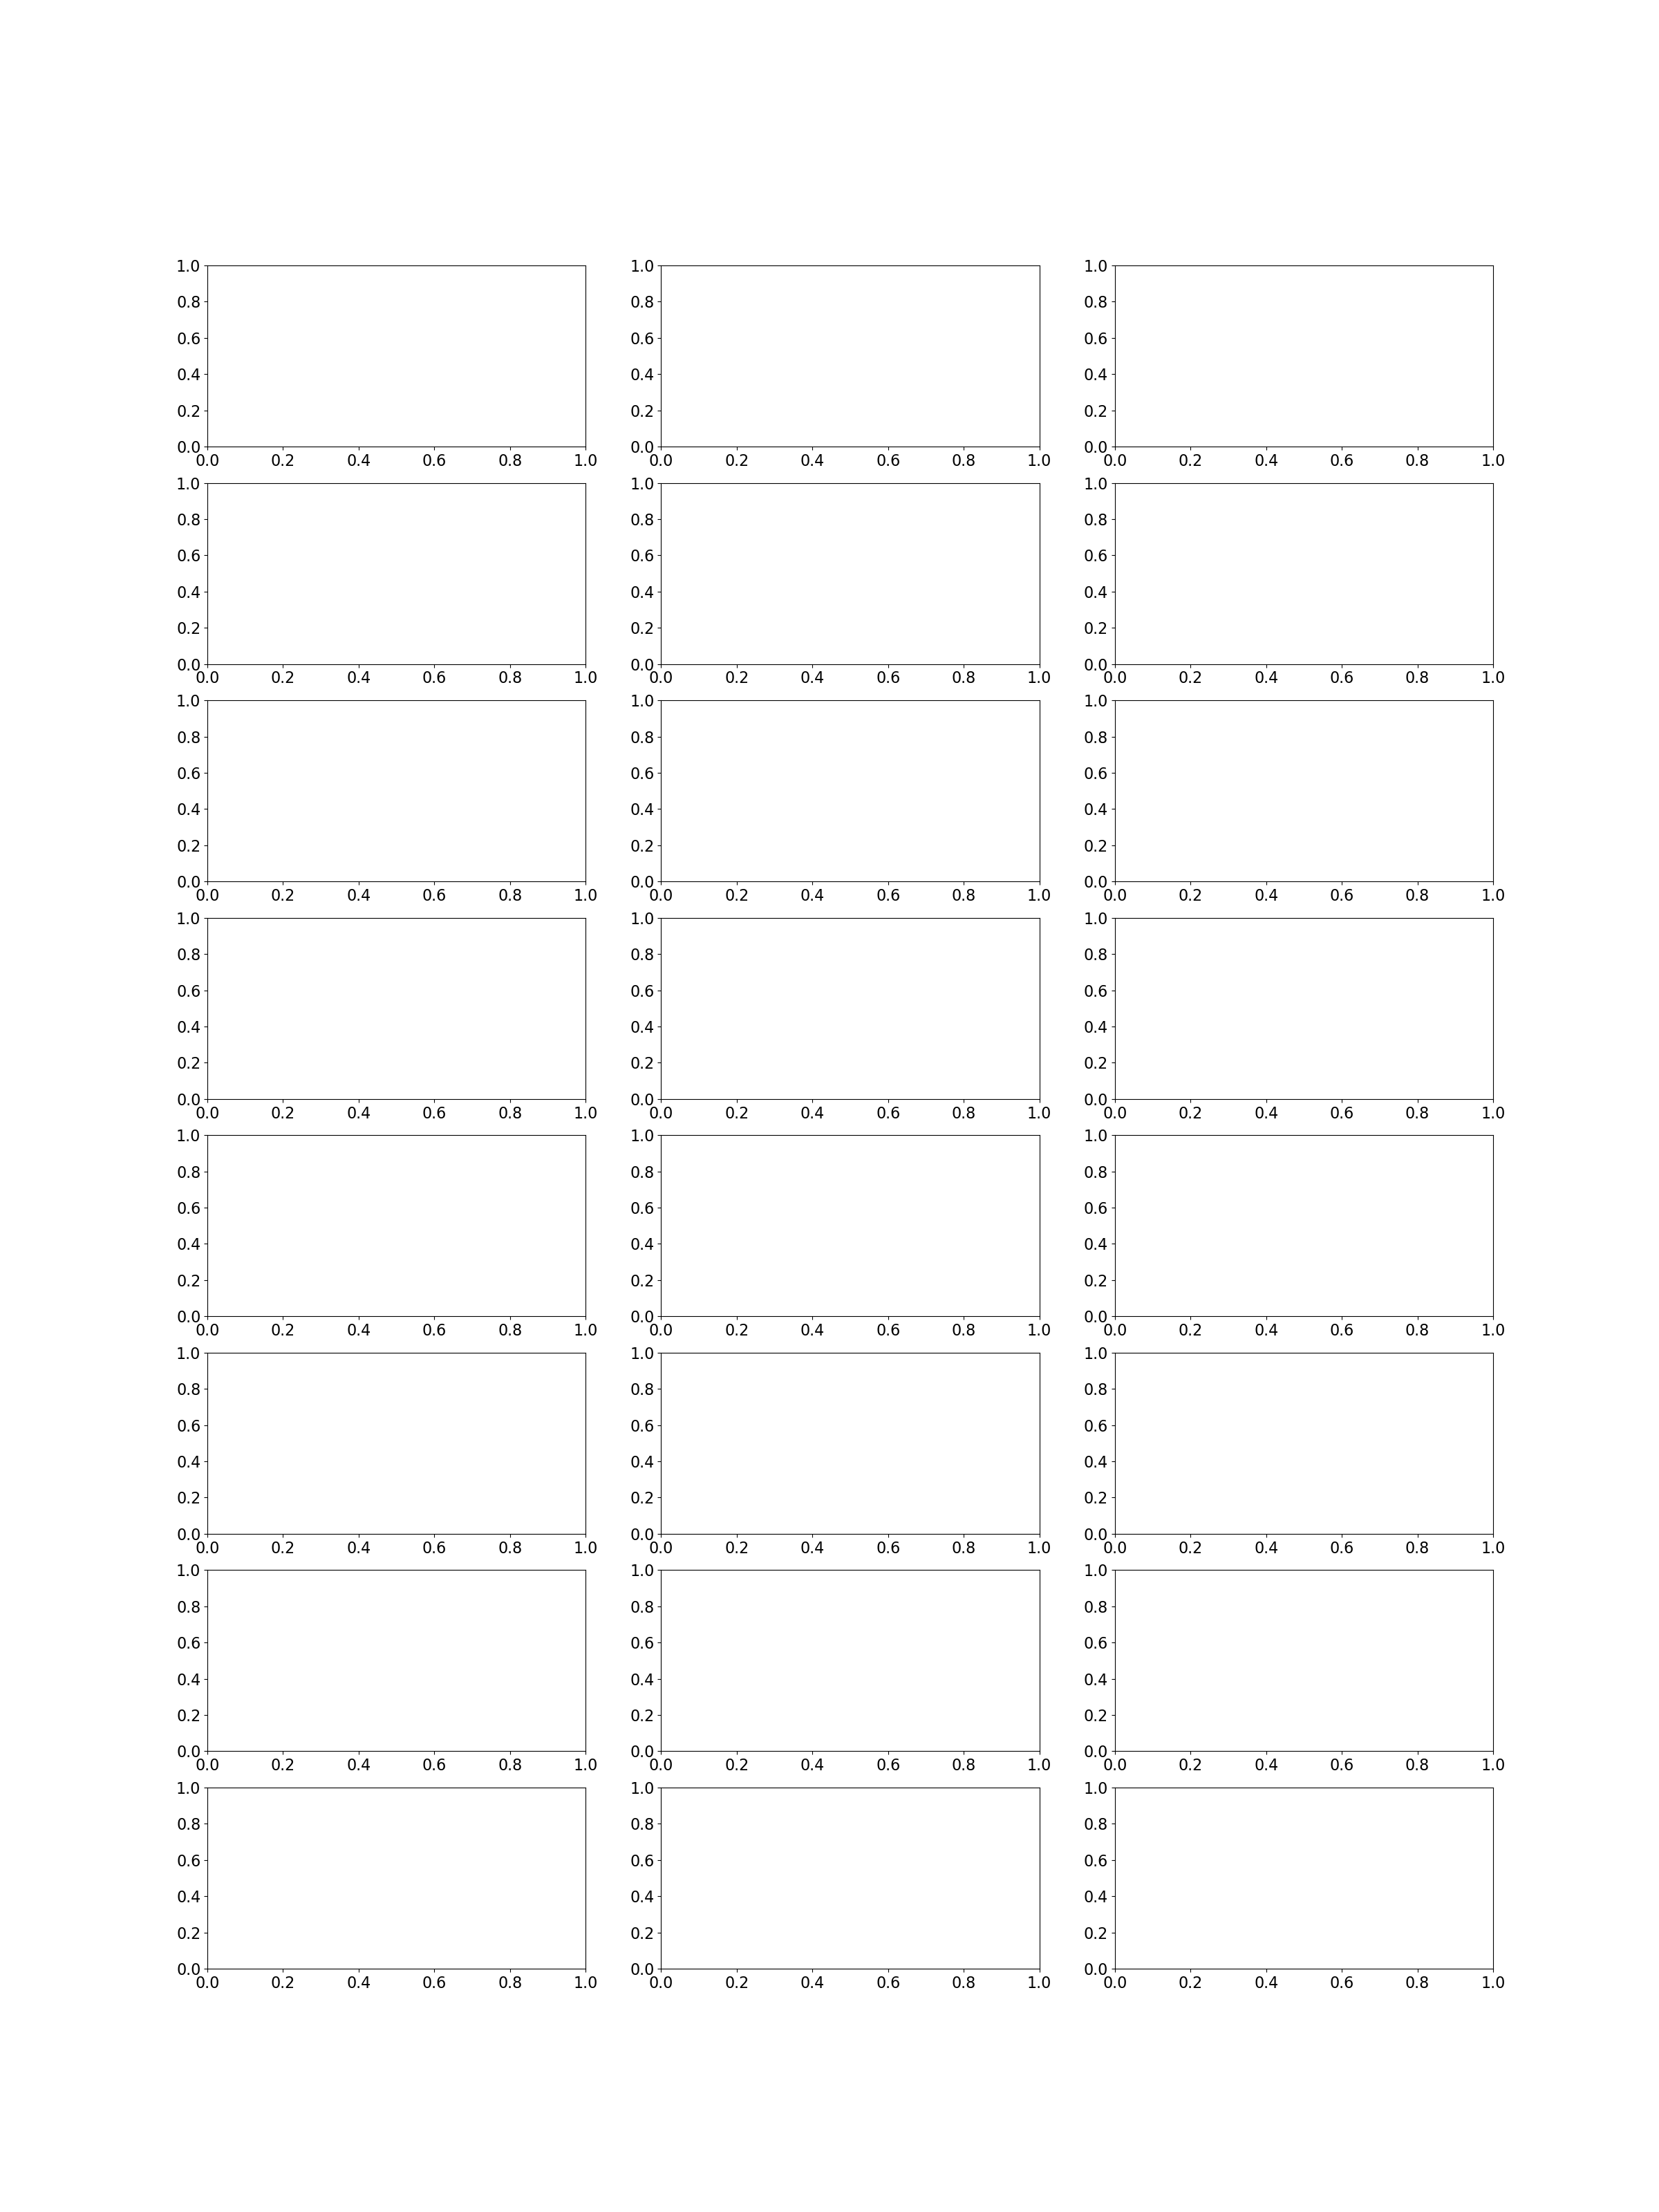

In [20]:
# plt.close('all')
ncols = 3
fig,axs = gridplot(len(plates),ncols = ncols,subh = 4.0,subw = 8)
maxis = {plate :12 for plate in plates}
maxis[52]=12
for i,ax in enumerate(axs):
    plate=plates[i]
    Cs, lambs,ds,indexes, t0s,meancurve,meancurve2 = plot_single_plate(plate,time_plate_info,timestep[plate],ax,maxi =maxis[plate])
    meancurves[plate]=meancurve
    meancurves2[plate]=meancurve2
    Css[plate] = Cs
    lambss[plate] = lambs
    dss[plate] = ds
    t0ss[plate] = t0s

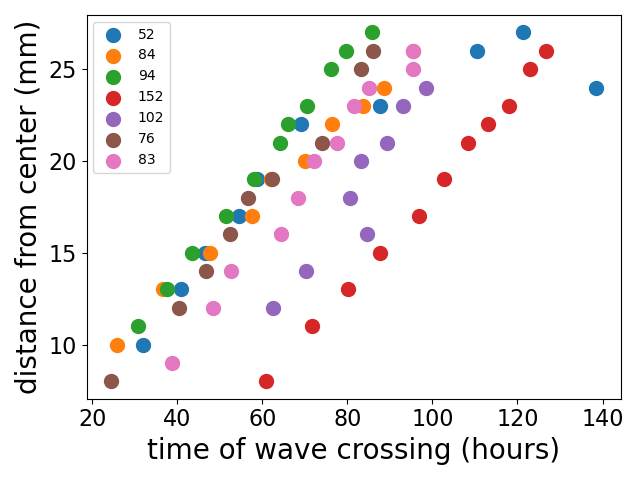

In [77]:
fig, ax = plt.subplots()
tot_ds = []
tot_Cs=[]
for plate in plates:
    t0s = t0ss[plate]
    ds = dss[plate]
    ax.scatter(t0s,ds,label = plate)
ax.legend()
ax.set_ylabel('distance from center (mm)')
ax.set_xlabel('time of wave crossing (hours)')
plt.tight_layout()

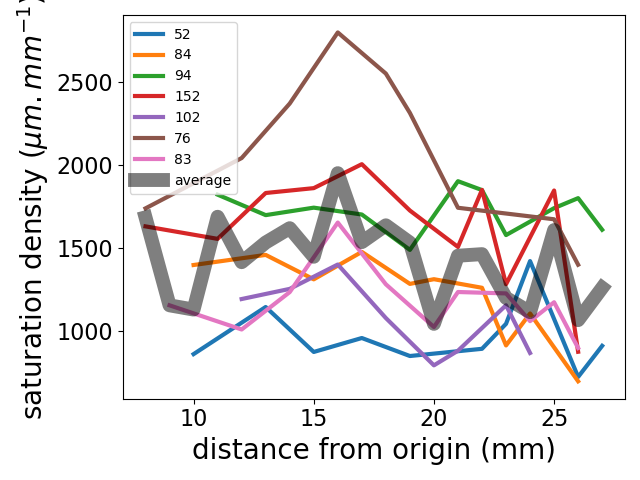

In [78]:
fig, ax = plt.subplots()
tot_ds = []
tot_Cs=[]
# plates = [52,152,94,102,83,84,792,76]
for plate in plates:
    Cs = Css[plate]
    ds = dss[plate]
    tot_ds+=ds
    tot_Cs+=Cs
    ax.plot(ds,Cs,label = plate)
df = pd.DataFrame((tot_ds,tot_Cs)).transpose()
df.columns = ('distance','saturation density')
data = df.groupby('distance').mean()
ax.plot(data.index,data,label="average",color='black',linewidth=10,alpha = 0.5)    
ax.legend()
ax.set_xlabel('distance from origin (mm)')
ax.set_ylabel('saturation density ($\mu m.mm^{-1}$)')
plt.tight_layout()

In [79]:
import statsmodels.api as sm
X = sm.add_constant(tot_ds, prepend=False)
model = sm.OLS(tot_Cs,X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     4.167
Date:                Fri, 21 Oct 2022   Prob (F-statistic):             0.0451
Time:                        10:52:44   Log-Likelihood:                -523.98
No. Observations:                  70   AIC:                             1052.
Df Residuals:                      68   BIC:                             1056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -20.3404      9.964     -2.041      0.0

In [23]:
TotCsA5 = [Cs for plate in plates for Cs in Css[plate]]

(array([ 6.,  5.,  9., 10., 12.,  5.,  7.,  9.,  7.,  2.,  1.,  1.,  1.,
         1.,  1.]),
 array([ 567.21981237,  715.80741253,  864.3950127 , 1012.98261287,
        1161.57021304, 1310.1578132 , 1458.74541337, 1607.33301354,
        1755.92061371, 1904.50821387, 2053.09581404, 2201.68341421,
        2350.27101438, 2498.85861454, 2647.44621471, 2796.03381488]),
 <BarContainer object of 15 artists>)

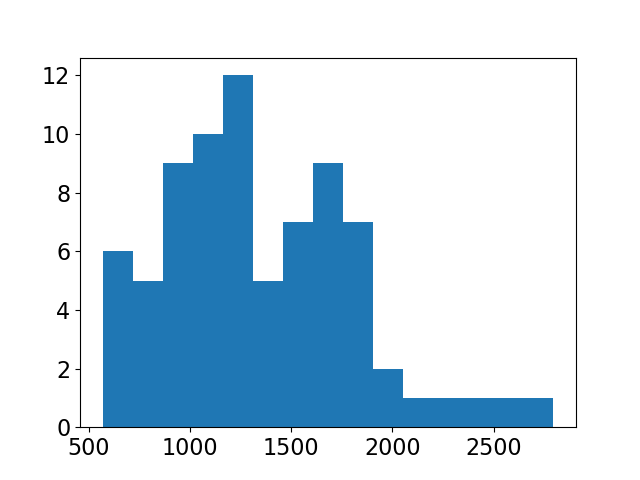

In [25]:
fig, ax = plt.subplots()
ax.hist(TotCsA5,15)

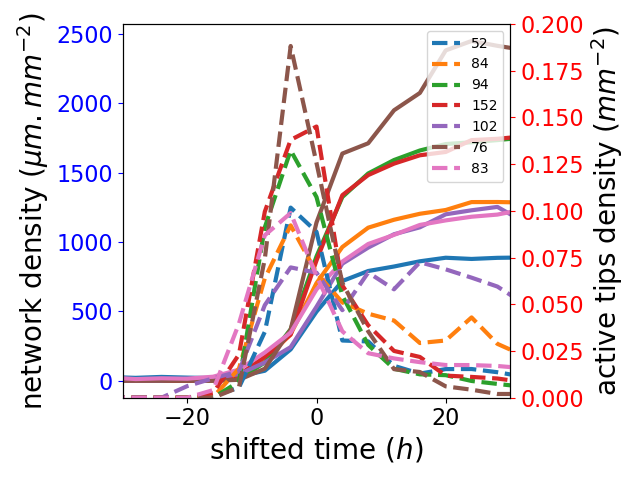

In [19]:
# plt.close('all')
fig, ax = plt.subplots()

ax2 = ax.twinx()

for plate in plates:
    meancurve = meancurves[plate]
    meancurve2 = meancurves2[plate]
    ax.plot(meancurve.index,meancurve,label=plate)
    ax2.plot(meancurve.index,meancurve2,label=plate,linestyle="dashed")
ax.set_xlim((-30,30))
ax2.set_ylim((0,0.2))

ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.legend()
plt.tight_layout()

In [115]:
strains = ["'C2'"]
plates = [plate for plate in folders['Plate'].unique() if folders.loc[folders['Plate']==plate].iloc[0]['strain'] in strains]
treatments = ["'001P100N100C'","'001P100N'"]
plates = [plate for plate in plates if folders.loc[folders['Plate']==plate].iloc[0]['medium'] in treatments]

# plates.remove(1071)
# plates.remove(938)
plates.remove(1040)
plates.remove(128)
plates.remove(1024)
plates.remove(1027)


# plates.remove(1030)

timestep = {1014 : 80,1024:25,1027:18,1028:60,1030 : 60,1032 : 50,1042 : 120,1048:70,127:120,129:60,130:50,991:40}
plates = [1014,1042,127,1048]

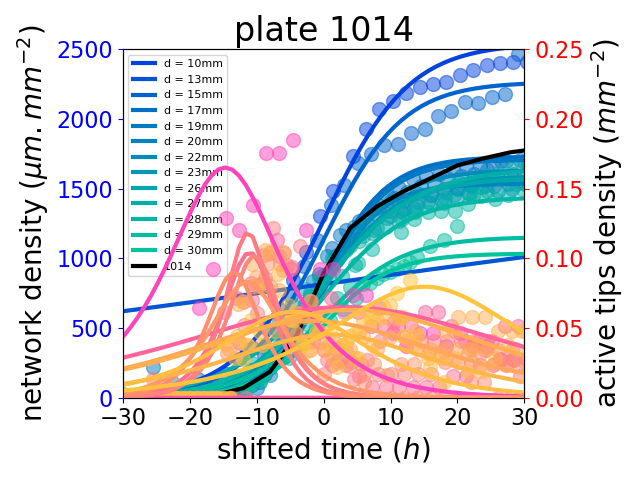

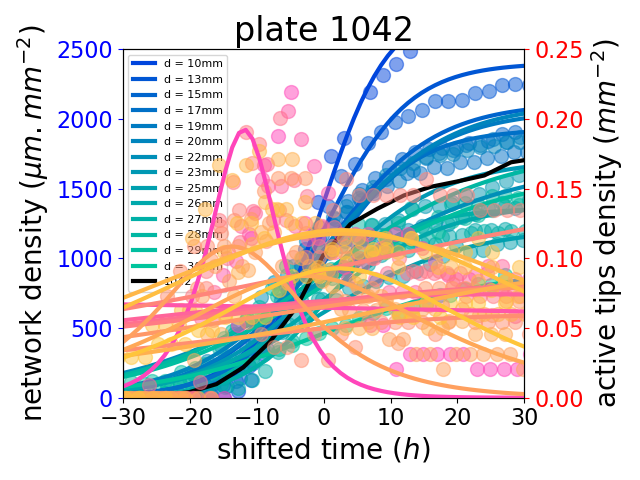

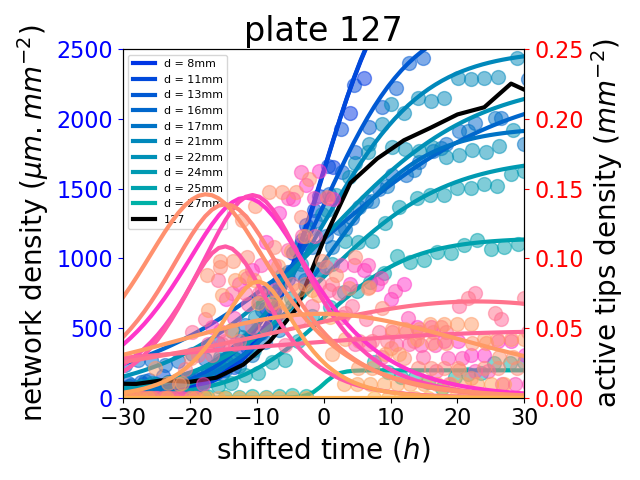

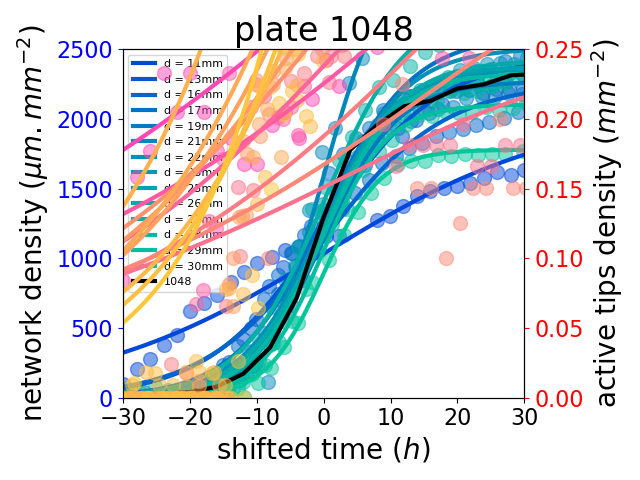

In [116]:
# plt.close('all')
for plate in plates:
    fig,ax = plt.subplots()
    Cs, lambs,ds,indexes, t0s,meancurve,meancurve2 = plot_single_plate(plate,time_plate_info,timestep[plate],ax,maxi = 15)
    meancurves[plate]=meancurve
    meancurves2[plate]=meancurve2
    Css[plate] = Cs
    lambss[plate] = lambs
    dss[plate] = ds

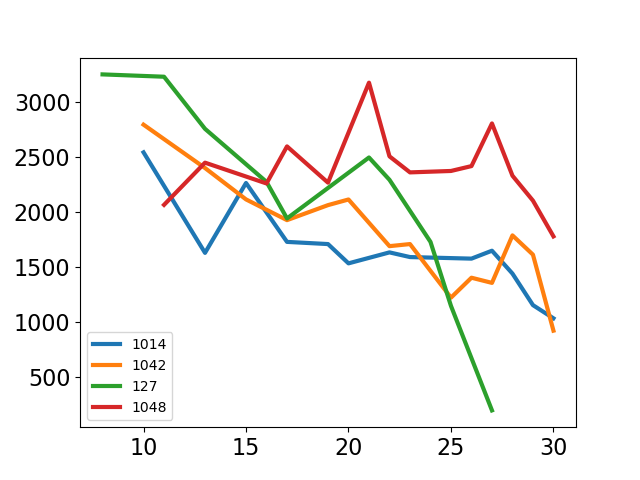

In [117]:
fig, ax = plt.subplots()
tot_ds = []
tot_Cs=[]
for plate in plates:
    Cs = Css[plate]
    ds = dss[plate]
    tot_ds+=ds
    tot_Cs+=Cs
    ax.plot(ds,Cs,label = plate)
    
ax.legend()



In [30]:
import statsmodels.api as sm
X = sm.add_constant(tot_ds, prepend=False)
model = sm.OLS(tot_Cs,X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     37.70
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           4.07e-08
Time:                        09:18:32   Log-Likelihood:                -547.57
No. Observations:                  74   AIC:                             1099.
Df Residuals:                      72   BIC:                             1104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -53.3706      8.692     -6.140      0.0

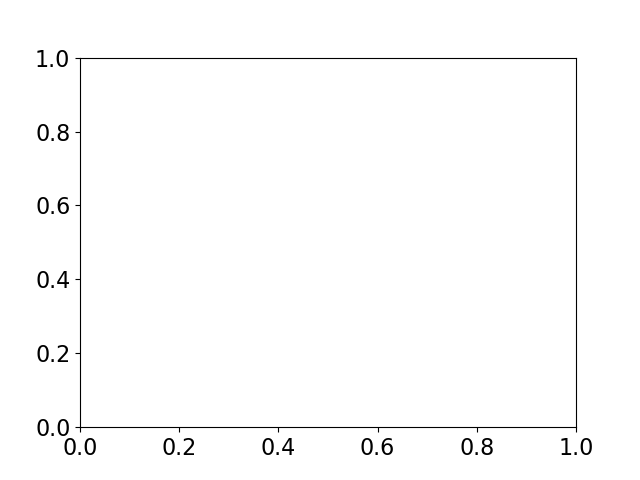

In [111]:
fig, ax = plt.subplots()

strains = ["'C2'"]
plates = [plate for plate in folders['Plate'].unique() if folders.loc[folders['Plate']==plate].iloc[0]['strain'] in strains]
treatments = ["'001P100N100C'","'001P100N'"]
plates = [plate for plate in plates if folders.loc[folders['Plate']==plate].iloc[0]['medium'] in treatments]
plates.remove(1040)
plates.remove(128)
plates.remove(1024)
plates.remove(1027)

Text(0.5, 0, 'Saturation density $(\\mu m.mm^{-2})$')

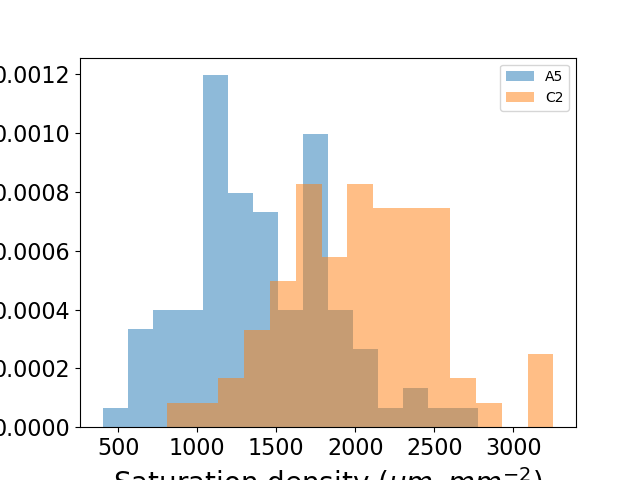

In [28]:
TotCsC2 = [Cs for plate in plates for Cs in Css[plate]]
fig, ax = plt.subplots()
ax.hist(TotCsA5,15,alpha = 0.5,label ="A5",density=True)
ax.hist(TotCsC2,15,alpha = 0.5,label ="C2",density=True)
plt.legend()
ax.set_xlabel('Saturation density $(\mu m.mm^{-2})$')


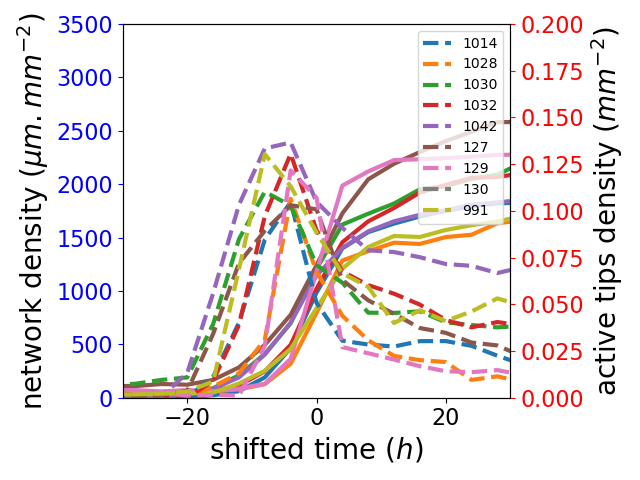

In [20]:


# plt.close('all')
fig, ax = plt.subplots()

ax2 = ax.twinx()

for plate in plates:
    meancurve = meancurves[plate]
    meancurve2 = meancurves2[plate]
    ax.plot(meancurve.index,meancurve,label=plate)
    ax2.plot(meancurve.index,meancurve2,label=plate,linestyle="dashed")
ax.set_xlim((-30,30))
ax2.set_ylim((0,0.2))
ax.set_ylim((0,3500))

ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.legend()
plt.tight_layout()

In [99]:
strains = ["'C2'"]
plates = [plate for plate in folders['Plate'].unique() if folders.loc[folders['Plate']==plate].iloc[0]['strain'] in strains]
treatments = ["'001P100N200C'"]
plates = [plate for plate in plates if folders.loc[folders['Plate']==plate].iloc[0]['medium'] in treatments]

# plates.remove(1071)

plates.remove(1039)

plates.remove(1051)
plates.remove(111111)


timestep = {1023 : 60,1031:30,1035:30,1037 : 80,1039 : 90,1045:70,1047:50,1053:50}
plates = [1023,1045,1053] #good quality

C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


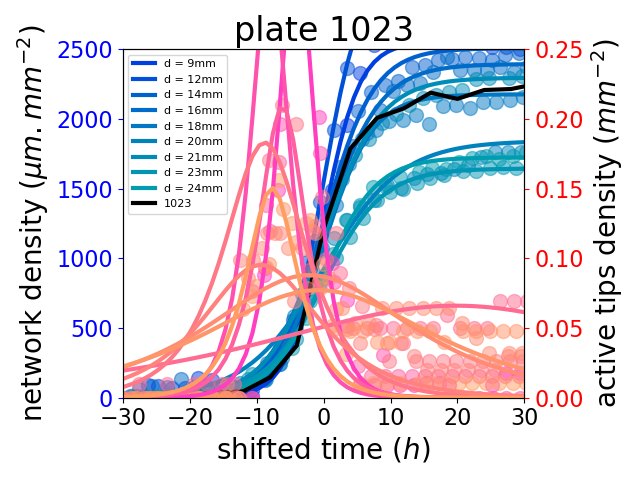

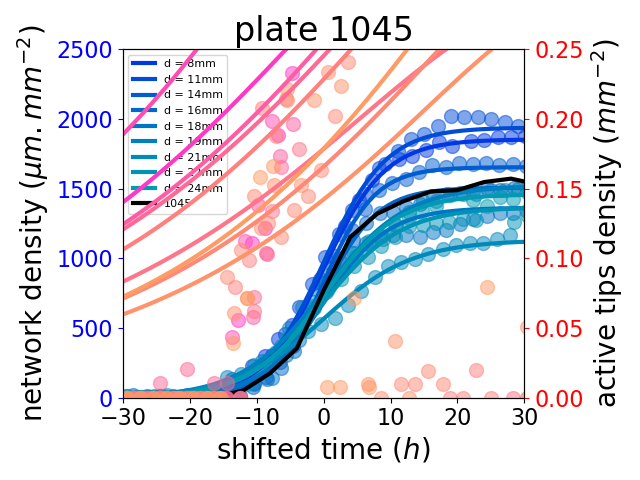

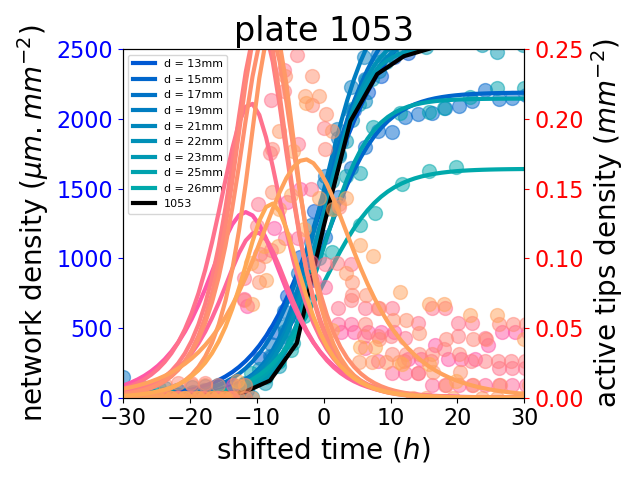

In [103]:
# plt.close('all')
for plate in plates:
    fig,ax = plt.subplots()
    Cs, lambs,ds,indexes, t0s,meancurve,meancurve2 = plot_single_plate(plate,time_plate_info,timestep[plate],ax,maxi = 10)
    meancurves[plate]=meancurve
    meancurves2[plate]=meancurve2
    Css[plate] = Cs
    lambss[plate] = lambs
    dss[plate] = ds

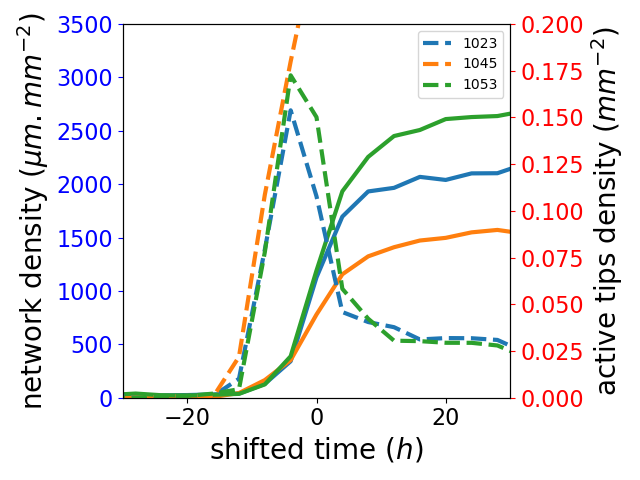

In [101]:
# plt.close('all')
fig, ax = plt.subplots()

ax2 = ax.twinx()

for plate in plates:
    meancurve = meancurves[plate]
    meancurve2 = meancurves2[plate]
    ax.plot(meancurve.index,meancurve,label=plate)
    ax2.plot(meancurve.index,meancurve2,label=plate,linestyle="dashed")
ax.set_xlim((-30,30))
ax2.set_ylim((0,0.2))
ax.set_ylim((0,3500))

ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.legend()
plt.tight_layout()

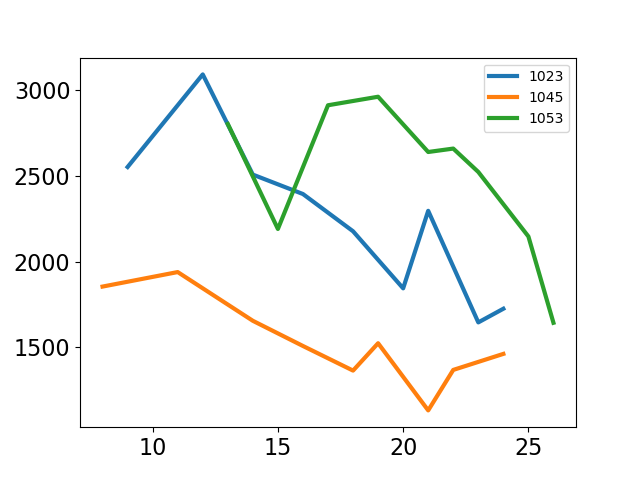

In [ ]:
fig, ax = plt.subplots()

for plate in plates:
    Cs = Css[plate]
    ds = dss[plate]
    ax.plot(ds,Cs,label=plate)
plt.legend()

In [107]:
strains = ["'A5'"]
plates = [plate for plate in folders['Plate'].unique() if folders.loc[folders['Plate']==plate].iloc[0]['strain'] in strains]
treatments = ["'001P100N200C'"]
plates = [plate for plate in plates if folders.loc[folders['Plate']==plate].iloc[0]['medium'] in treatments]


plates.remove(1071)
timestep = {1071 : 25,1076:70,839:60,938 : 35}


C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


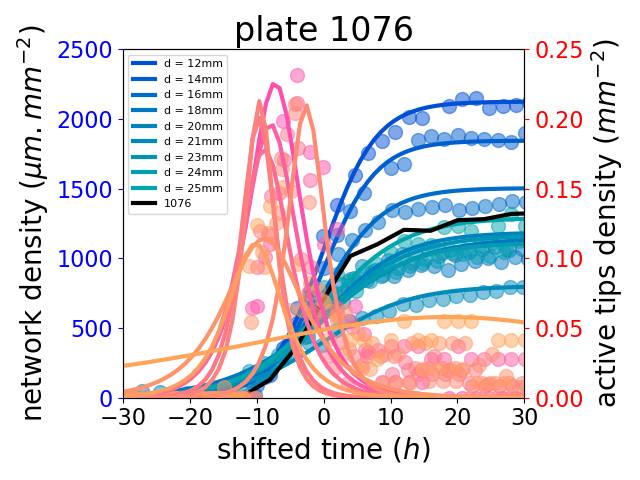

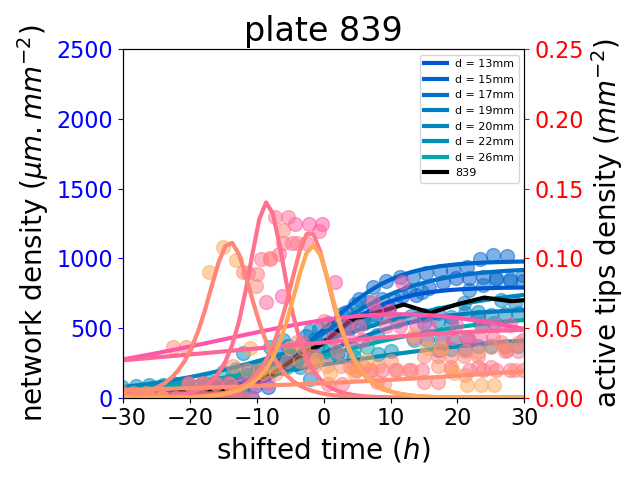

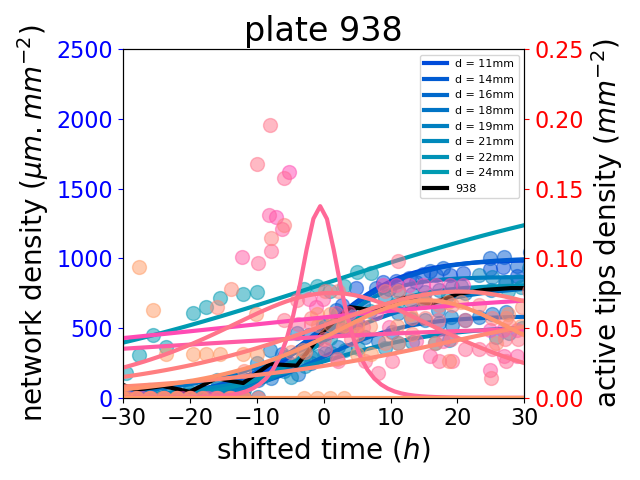

In [110]:
# plt.close('all')
for plate in plates:
    fig,ax = plt.subplots()
    
    Cs, lambs,ds,indexes, t0s,meancurve,meancurve2 = plot_single_plate(plate,time_plate_info,timestep[plate],ax=ax)
    meancurves[plate]=meancurve
    meancurves2[plate]=meancurve2
    Css[plate] = Cs
    lambss[plate] = lambs
    dss[plate] = ds

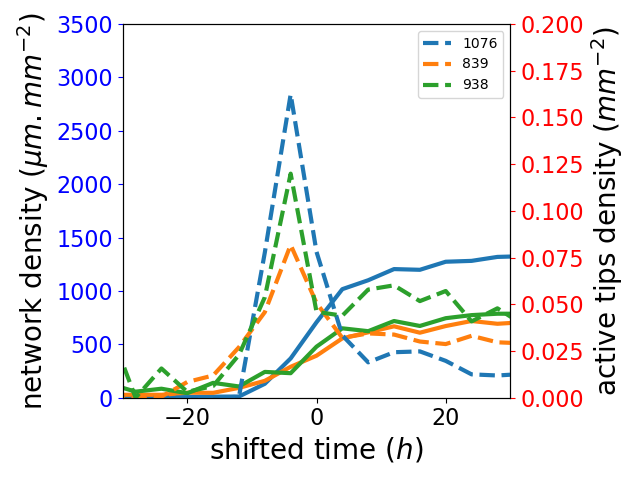

In [18]:
# plt.close('all')
fig, ax = plt.subplots()

ax2 = ax.twinx()

for plate in plates:
    meancurve = meancurves[plate]
    meancurve2 = meancurves2[plate]
    ax.plot(meancurve.index,meancurve,label=plate)
    ax2.plot(meancurve.index,meancurve2,label=plate,linestyle="dashed")
ax.set_xlim((-30,30))
ax2.set_ylim((0,0.2))
ax.set_ylim((0,3500))

ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.legend()
plt.tight_layout()

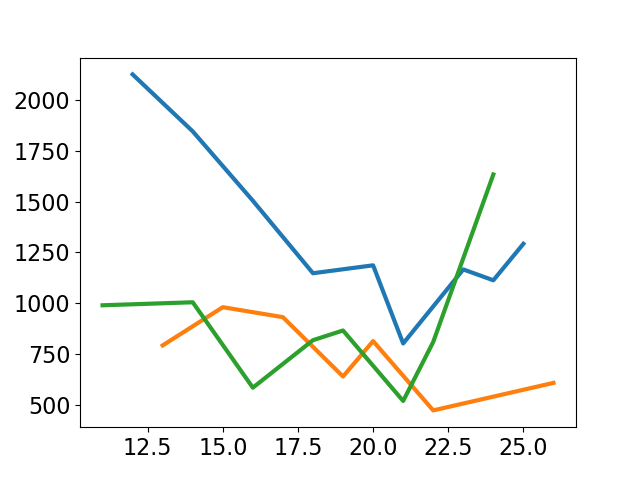

In [19]:
fig, ax = plt.subplots()

for plate in plates:
    Cs = Css[plate]
    ds = dss[plate]
    ax.plot(ds,Cs)

In [105]:
# fig, ax = plt.subplots()
treatments = set()
for plate in folders['Plate'].unique():
    if plate in meancurves.keys():
        strain = folders.loc[folders['Plate']==plate].iloc[0]['strain']
        medium = folders.loc[folders['Plate']==plate].iloc[0]['medium']
        treatment = strain+medium
        treatments.add(strain+medium)
colors = {"'A5''001P100N'" : 'orange',
 "'A5''001P100N100C'" : 'orange',
 "'A5''001P100N200C'" : 'red',
 "'A5sp3''001P100N100C'" :'orange',
 "'C2''001P100N100C'" : 'blue',
 "'C2''001P100N200C'" : 'purple'}

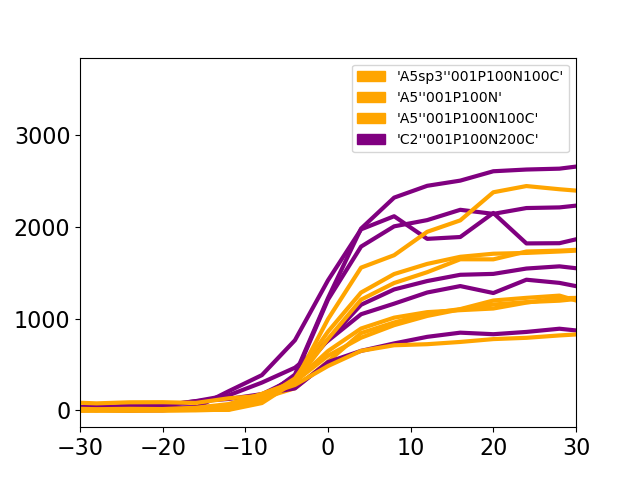

In [106]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

for plate in folders['Plate'].unique():
    if plate in meancurves.keys():
        strain = folders.loc[folders['Plate']==plate].iloc[0]['strain']
        medium = folders.loc[folders['Plate']==plate].iloc[0]['medium']
        treatment = strain+medium
        meancurve = meancurves[plate]
        ax.plot(meancurve.index,meancurve,label=plate,color = colors[treatment])
ax.set_xlim((-30,30))
patches = []
for treatment in treatments:
    patches.append(mpatches.Patch(color=colors[treatment], label=treatment))
ax.legend(handles=patches)


C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


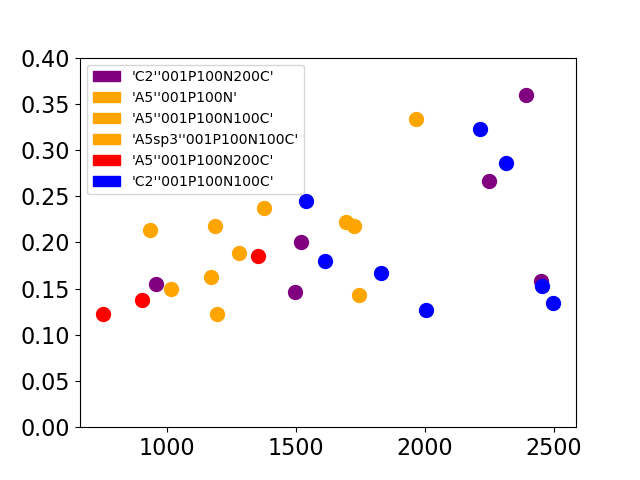

In [28]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

for plate in folders['Plate'].unique():
    if plate in meancurves.keys():
        strain = folders.loc[folders['Plate']==plate].iloc[0]['strain']
        medium = folders.loc[folders['Plate']==plate].iloc[0]['medium']
        treatment = strain+medium
        Cs = Css[plate]
        lambs = lambss[plate]
        ax.scatter(np.mean(Cs),np.mean(lambs),label=plate,color = colors[treatment])
# ax.set_xlim((-30,30))
ax.set_ylim(0,0.4)
patches = []
for treatment in treatments:
    patches.append(mpatches.Patch(color=colors[treatment], label=treatment))
ax.legend(handles=patches)

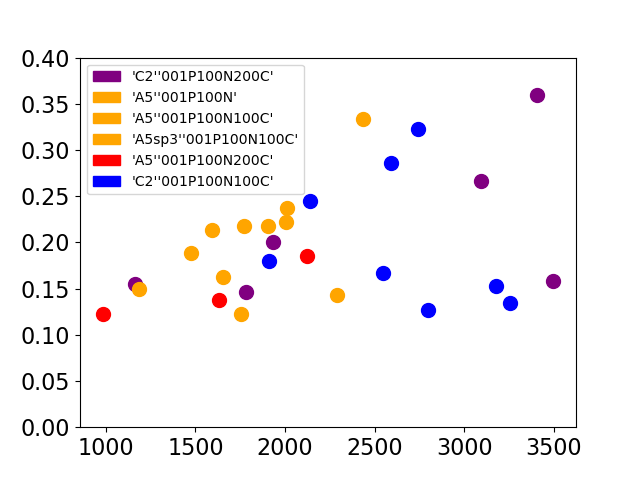

In [27]:
fig, ax = plt.subplots()

for plate in folders['Plate'].unique():
    if plate in meancurves.keys():
        strain = folders.loc[folders['Plate']==plate].iloc[0]['strain']
        medium = folders.loc[folders['Plate']==plate].iloc[0]['medium']
        treatment = strain+medium
        Cs = Css[plate]
        lambs = lambss[plate]
        if len(Cs)>0:
            ax.scatter(np.max(Cs),np.mean(lambs),label=plate,color = colors[treatment])
# ax.set_xlim((-30,30))
ax.set_ylim(0,0.4)
patches = []
for treatment in treatments:
    patches.append(mpatches.Patch(color=colors[treatment], label=treatment))
ax.legend(handles=patches)

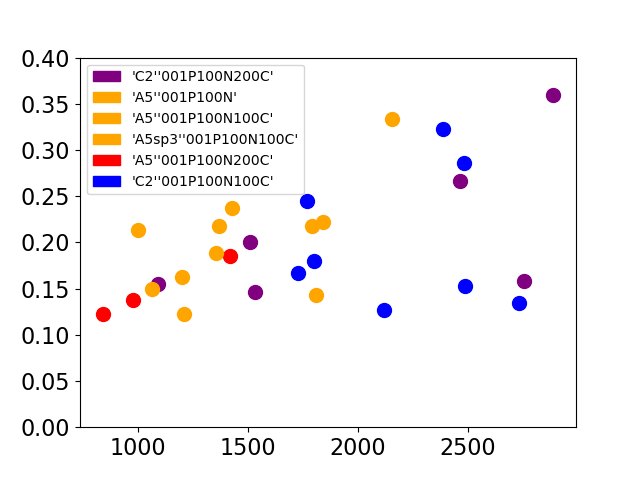

In [26]:
fig, ax = plt.subplots()

for plate in folders['Plate'].unique():
    if plate in meancurves.keys():
        strain = folders.loc[folders['Plate']==plate].iloc[0]['strain']
        medium = folders.loc[folders['Plate']==plate].iloc[0]['medium']
        treatment = strain+medium
        Cs = Css[plate]
        lambs = lambss[plate]
        if len(Cs)>0:
            ax.scatter(np.percentile(Cs,70),np.mean(lambs),label=plate,color = colors[treatment])
# ax.set_xlim((-30,30))
ax.set_ylim(0,0.4)
patches = []
for treatment in treatments:
    patches.append(mpatches.Patch(color=colors[treatment], label=treatment))
ax.legend(handles=patches)

KeyError: 'ring_bas_density_incr-100_index-0'

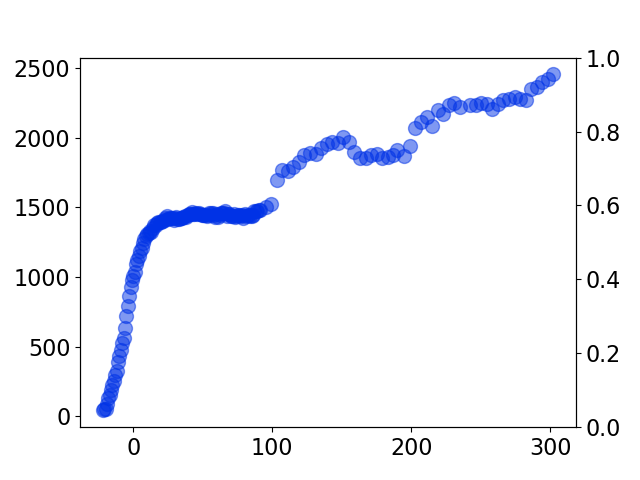

In [25]:
plt.close('all')
plate = 94
fig, ax = plt.subplots()

ax2 = ax.twinx()
maxi = 12
table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
table= table.set_index('timestep')

ts = []
ys = []
ys2 = []
max_area = 50
Cs = []
lambs = [] 
indexes = []
for index in range(0,maxi):
    column = f"ring_density_incr-100_index-{index}"
    column2 = f"ring_active_tips_density_incr-100_index-{index}"
    column2 = f"ring_bas_density_incr-100_index-{index}"
    
    start = np.min(table.loc[table[column]>=1000]['time_since_begin'])/pd.Timedelta(hours=1)
    if not np.isnan(start):
        table[f'time_since_begin_{index}']=table['time_since_begin']/pd.Timedelta(hours=1)-start
        area = np.sqrt(table["area_sep_comp"][0]+100*index)

        ax.scatter(table[f'time_since_begin_{index}'],table[column],alpha=0.5,color=cmap2(area/max_area))
        ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.5,color=cmap1(area/max_area))
#         ax2.plot(table[f'time_since_begin_{index}'],table[column2]/(table[column]+1),alpha=0.5,color=cmap1(area/max_area))
        
        selection_fit = table
        popt0, pcov = curve_fit(S, selection_fit[f'time_since_begin_{index}'],selection_fit[column] ,bounds = ([0,0,-np.inf],3*[np.inf]),p0=[1,1,0])
        lamb,C,t0 = list(popt0)
        Cs.append(C)
        lambs.append(lamb)
        indexes.append(index)
        ax.plot(table[f'time_since_begin_{index}'],S(table[f'time_since_begin_{index}'],lamb,C,t0),color=cmap2(area/max_area),label=f'd = {int(area/np.sqrt((np.pi/2)))}mm')
        ts +=table[f'time_since_begin_{index}'].to_list()
        ys += table[column].to_list()
        ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
# ax2.set_ylim((0,0.5))

ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
# ax2.set_ylabel('bas/L ratio ($mm^{-2}$)')
ax2.set_ylabel('bas length ($mm^{-2}$)')

ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
ax.legend(fontsize = 8)
plt.tight_layout()
plt.savefig("Figure/plate95fixedpoint.svg")

In [ ]:
fig, ax = plt.subplots()
ax.scatter(indexes,lambs)
# ax.set_ylim(0,20)

In [ ]:
folders['strain'].unique()

In [ ]:
strain = "'A5'"
plates = [plate for plate in folders['Plate'].unique() if folders.loc[folders['Plate']==plate].iloc[0]['strain']==strain]

In [ ]:
plates

In [ ]:
plt.close('all')
fig, ax = plt.subplots()

ax2 = ax.twinx()
maxi = 12
max_area = 50
Cs = []
lambs = [] 
indexes = []
# plates = [94,152,792,799,800,91,80]
for plate in plates:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    table= table.set_index('timestep')
    
    ts = []
    ys = []
    ys2 = []
    for index in range(1,maxi):
        column = f"ring_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column]>=1000]['time_since_begin'])/pd.Timedelta(hours=1)
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']/pd.Timedelta(hours=1)-start
            area = np.sqrt(table["area_sep_comp"][0]+100*index)
            selection_fit = table
            popt0, pcov = curve_fit(S, selection_fit[f'time_since_begin_{index}'],selection_fit[column] ,bounds = ([0,0,-np.inf],3*[np.inf]),p0=[1,1,0])
            lamb,C,t0 = list(popt0)
            Cs.append(C)
            lambs.append(lamb)
            indexes.append(index)
            plates.append(plate)
            ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.5,color=cmap2(area/max_area))
            ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.5,color=cmap1(area/max_area))

            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].to_list()
            ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

In [ ]:
cmap3 = mpl.cm.get_cmap('jet')

In [ ]:
cmap3(128)

In [ ]:
colors = {plate : cmap3(np.random.random()) for plate in plates}

In [ ]:
colors

In [ ]:
fig, ax = plt.subplots()
data = pd.DataFrame(np.array((indexes,lambs,plates)).transpose(),columns=('index','lamb',"plate"))
data = data.loc[data['lamb']<1]
data.groupby('index')['lamb'].mean()
group = data.groupby('index')['lamb']
ax.plot(group.mean()) 

ax.scatter(data['index'],data['lamb'],alpha = 0.5,color = [colors[plate] for plate in data['plate']])
ax.errorbar(group.mean().index,group.mean(),group.std()/np.sqrt(group.count()))
ax.set_xlabel("ring index")
ax.set_ylabel("$\lambda (h^{-1})$")
plt.savefig("lambdas.svg")

In [ ]:
fig, ax = plt.subplots()
data = pd.DataFrame(np.array((indexes,lambs,Cs,plates)).transpose(),columns=('index','lamb','C',"plate"))
y = 'C'
data = data.loc[data[y]<5000]
data.groupby('index')[y].mean()
group = data.groupby('index')[y]
ax.plot(group.mean()) 

ax.scatter(data["index"],data[y],alpha = 0.5,color = [colors[plate] for plate in data['plate']])
ax.errorbar(group.mean().index,group.mean(),group.std()/np.sqrt(group.count()))
ax.set_xlabel("ring index")
ax.set_ylabel("$C (\mu m.mm{-2})$")
plt.savefig("Cs.svg")

In [ ]:
data

In [ ]:
data

In [ ]:
data = pd.DataFrame(np.array((indexes,lambs)).transpose(),columns=('index','lamb'))
data = data.loc[data['lamb']<1]
data.groupby('index')['lamb'].mean()

In [ ]:
list(table.columns)

In [ ]:
plt.close('all')
plate = 94
table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
fig, ax = plt.subplots()
ts = []
ys = []
ys2 = []
ax2 = ax.twinx()

for index in range(20):
    column = f"ring_density_incr-100_index-{index}"
    column2 = f"ring_bas_density_incr-100_index-{index}"
    start = np.min(table.loc[table[column]>=1000]['time_since_begin'])
    if not np.isnan(start):
        table[f'time_since_begin_{index}']=table['time_since_begin']-start
        ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
        ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

        ts +=table[f'time_since_begin_{index}'].to_list()
        ys += table[column].to_list()
        ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax2.set_ylim((-25,650))
ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('bas density ($\mu m.mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

In [ ]:
plt.close('all')
plate = 94
table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
fig, ax = plt.subplots()
ts = []
ys = []
ys2 = []
ax2 = ax.twinx()

for index in range(20):
    column = f"ring_branch_density_incr-100_index-{index}"
    column2 = f"ring_active_tips_density_incr-100_index-{index}"
    start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
    if not np.isnan(start):
        table[f'time_since_begin_{index}']=table['time_since_begin']-start
        ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
        ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

        ts +=table[f'time_since_begin_{index}'].to_list()
        ys += table[column].astype(float).to_list()
        ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((-0.00030,0.010))
ax.set_ylabel('new branch density ($mm^{-2}.h^{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

In [ ]:
plt.close('all')
plate = 94
table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
fig, ax = plt.subplots()
ts = []
ys = []
ys2 = []
ax2 = ax.twinx()

for index in range(20):
    column = f"ring_anas_density_incr-100_index-{index}"
    column2 = f"ring_active_tips_density_incr-100_index-{index}"
    start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
    if not np.isnan(start):
        table[f'time_since_begin_{index}']=table['time_since_begin']-start
        ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
        ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

        ts +=table[f'time_since_begin_{index}'].to_list()
        ys += table[column].astype(float).to_list()
        ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((0,0.0020))
ax2.set_ylim((0,0.25))

ax.set_ylabel('anastomosis density ($mm^{-2}.h^{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

In [ ]:
plt.close('all')
plate = 94
table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
fig, ax = plt.subplots()
ts = []
ys = []
ys2 = []
ax2 = ax.twinx()

for index in range(15):
    column = f"mean_speed_incr-100_index-{index}"
    column2 = f"ring_active_tips_density_incr-100_index-{index}"
    column_speed = f"mean_speed_incr-100_index-{index}"
    
    start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
    if not np.isnan(start):
        table[f'time_since_begin_{index}']=table['time_since_begin']-start
        table = table.loc[(table[column_speed]<=400) | (table[column_speed].isnull()==True)]
        
        ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
        ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

        ts +=table[f'time_since_begin_{index}'].to_list()
        ys += table[column].astype(float).to_list()
        ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((100,350))
ax.set_ylabel('new branch density ($mm^{-2}.h{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

In [ ]:
plt.close('all')
fig, ax = plt.subplots()

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91,76]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []


    for index in range(20):
        column = f"ring_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
    ax.plot(meancurve.index,meancurve,label=plate)
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    ax2.plot(meancurve.index,meancurve2,label=plate,linestyle="dashed")
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.legend()
plt.savefig("replicate.svg")
plt.tight_layout()

In [ ]:
plt.close('all')
fig, ax = plt.subplots()

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []


    for index in range(15):
        column3 = f"ring_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column3]>=1000]['time_since_begin'])
        column = f"mean_speed_incr-100_index-{index}"
        column_speed = f"mean_speed_incr-100_index-{index}"
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
            table = table.loc[(table[column_speed]<=400) | (table[column_speed].isnull()==True)]
            
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].astype(float).to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
    ax.plot(meancurve.index,meancurve,label=plate)
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    ax2.plot(meancurve.index,meancurve2,label=plate,linestyle="dashed")
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((100,350))

ax.set_ylabel('mean speed ($\mu m.h^{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.legend()

In [ ]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(20):
        column = f"ring_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        column_speed = f"mean_speed_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"mean_speed_incr-100_index-{index}"

        align_col = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[align_col]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
            table = table.loc[(table[column_speed]<=400) | (table[column_speed].isnull()==True)]
            
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 4
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
grad = np.gradient(meancurve,meancurve.index)

meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()
ax2.plot(meancurve3.index,meancurve3,linewidth = 5,color='red')

ax.plot(meancurve2.index,meancurve2*meancurve3,linewidth = 5)
ax2.set_ylim((140,250))

# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel('n ($mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('v ($\mu m.h^{-1}$')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

In [ ]:
# plt.close('all')
# fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
# ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(20):
        column2 = f"mean_speed_incr-100_index-{index}"
        column = f"ring_active_tips_density_incr-100_index-{index}"
        column_speed = f"mean_speed_incr-100_index-{index}"
        
        start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
            table = table.loc[(table[column2]<=400) | (table[column2].isnull()==True)]
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            tstot +=table[f'time_since_begin_{index}'].to_list()
            ystot += table[column].astype(float).to_list()
            ys2tot+=table[column2].astype(float).to_list()
            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].astype(float).to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
#     ax.plot(meancurve.index,meancurve,color='blue',alpha=0.5)
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    ax2.plot(meancurve.index,meancurve2,color='red',alpha = 0.5)
# df = pd.DataFrame((np.array((tstot,ystot,ys2tot))).transpose(),columns=('ts','ys','ys2'))
# factor = 4
# df['ts_round'] = (df['ts']/factor).astype(int)*factor
# meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,linewidth = 5)
# meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,linewidth = 5,color='red')
# # ax2.set_color('red')
# ax.set_xlim((-30,30))
# ax2.set_ylabel('mean speed ($\mu m.h^{-1}$)')
# ax.set_xlabel('shifted time ($h$)')
# ax.set_ylabel('active tips density ($mm^{-2}$)')
# ax.tick_params(axis='y', colors='blue')
# ax2.tick_params(axis='y', colors='red')
# ax2.set_ylim((100,350))

# plt.legend()

In [ ]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(20):
        column = f"ring_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"mean_speed_incr-100_index-{index}"

        align_col = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[align_col]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 1
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
grad = np.gradient(meancurve,meancurve.index)

ax.plot(meancurve.index,meancurve,linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()

ax2.plot(meancurve2.index,meancurve2,color='red',label = 'data')
ax2.plot(meancurve2.index,grad/700,color='red',label = r'$\frac{\partial \rho_{data}}{\partial t}$ (scaled)',linestyle="dashed")

# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel(r'$\rho$ ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel(r'$n$ ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
ax2.set_ylim((0,0.15))
plt.legend(fontsize=15)
plt.tight_layout()

In [ ]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(20):
        column = f"ring_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"mean_speed_incr-100_index-{index}"

        align_col = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[align_col]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 1
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
grad = np.gradient(meancurve,meancurve.index)

ax.plot(meancurve.index,meancurve,linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()

ax2.plot(meancurve2.index,meancurve2*meancurve3*2.56,color='red',label = 'data')
ax2.plot(meancurve2.index,grad,color='red',label = r'$\frac{\partial \rho_{data}}{\partial t}$',linestyle="dashed")

# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel(r'$\rho$ ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel(r'$nv$ ($\mu m.mm^{-2}.h^{-1}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
ax2.set_ylim((0,80))
plt.legend(fontsize=15)
plt.tight_layout()

In [ ]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(15):
        column = f"ring_anas_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column3]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 1
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()

ax2.plot(meancurve2.index,meancurve2*meancurve3,linewidth = 5,color='red')
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((0,0.0019))

ax.set_ylabel('anastomosis density ($mm^{-2}.h^{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel(r'$\rho n$ ($\mu m. mm^{-4}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

In [ ]:
np.max(meancurve)/np.max(meancurve2*meancurve3)

In [ ]:
# plt.close('all')
# fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
# ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(15):
        column = f"ring_anas_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            tstot +=table[f'time_since_begin_{index}'].to_list()
            ystot += table[column].astype(float).to_list()
            ys2tot+=table[column2].astype(float).to_list()
            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].astype(float).to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
#     ax.plot(meancurve.index,meancurve,color='blue',alpha=0.5)
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    ax.plot(meancurve.index,meancurve,color='blue',alpha = 0.5)
# df = pd.DataFrame((np.array((tstot,ystot,ys2tot))).transpose(),columns=('ts','ys','ys2'))
# factor = 4
# df['ts_round'] = (df['ts']/factor).astype(int)*factor
# meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,linewidth = 5)
# meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,linewidth = 5,color='red')
# # ax2.set_color('red')
# ax.set_xlim((-30,30))
# ax.set_ylabel('anastomosis density ($mm^{-2}.h{-1}$)')
# ax.set_xlabel('shifted time ($h$)')
# ax2.set_ylabel('active tips density ($mm^{-2}$)')
# ax.tick_params(axis='y', colors='blue')
# ax2.tick_params(axis='y', colors='red')
# plt.legend()

In [ ]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(15):
        column = f"ring_branch_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column3]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 1
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()

ax2.plot(meancurve2.index,meancurve2,linewidth = 5,color='red')
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((0,0.0074))

ax.set_ylabel('branch density ($mm^{-2}.h^{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel(r'$n$ ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

In [ ]:
np.max(meancurve)/np.max(meancurve2)

In [ ]:
np.max(meancurve)/np.max(meancurve2)/(2.2e-5)

In [ ]:
# plt.close('all')
# fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
# ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(15):
        column = f"ring_branch_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            tstot +=table[f'time_since_begin_{index}'].to_list()
            ystot += table[column].astype(float).to_list()
            ys2tot+=table[column2].astype(float).to_list()
            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].astype(float).to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
#     ax.plot(meancurve.index,meancurve,color='blue',alpha=0.5)
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    ax.plot(meancurve2.index,meancurve,color='blue',alpha = 0.5)
# df = pd.DataFrame((np.array((tstot,ystot,ys2tot))).transpose(),columns=('ts','ys','ys2'))
# factor = 4
# df['ts_round'] = (df['ts']/factor).astype(int)*factor
# meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,linewidth = 5)
# meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,linewidth = 5,color='red')
# # ax2.set_color('red')
# ax.set_xlim((-30,30))
# ax.set_ylabel('anastomosis density ($mm^{-2}.h{-1}$)')
# ax.set_xlabel('shifted time ($h$)')
# ax2.set_ylabel('active tips density ($mm^{-2}$)')
# ax.tick_params(axis='y', colors='blue')
# ax2.tick_params(axis='y', colors='red')
# plt.legend()

In [ ]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(20):
        column = f"ring_anas_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column3]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 1
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()

ax2.plot(meancurve2.index,meancurve2*meancurve3,linewidth = 5,color='red')
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel('anastomosis density ($mm^{-2}.h{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel(r'$\rho n$ ($\mu m. mm^{-}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
